In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../reports/energy_estimation.csv")


In [3]:
if "energy_kWh" in df.columns:
    annual_energy = df["energy_kWh"].sum()
else:
    # fallback in case we stored only one summary row
    annual_energy = df.iloc[0].sum()

In [4]:
tariff = 6.0  # INR/kWh
system_cost_per_kw = 50000  # INR per kW installed
system_size_kw = 5  # assume a 5 kW system
system_cost = system_cost_per_kw * system_size_kw

annual_savings = annual_energy * tariff
payback_years = system_cost / annual_savings if annual_savings > 0 else float("inf")

In [5]:
results = pd.DataFrame({
    "Annual Energy (kWh)": [annual_energy],
    "Annual Savings (INR)": [annual_savings],
    "System Cost (INR)": [system_cost],
    "Payback Period (years)": [payback_years],
})

In [6]:
results.to_csv("../reports/financial_analysis.csv", index=False)


In [7]:
years = list(range(1, 26))
savings = [annual_savings * y for y in years]

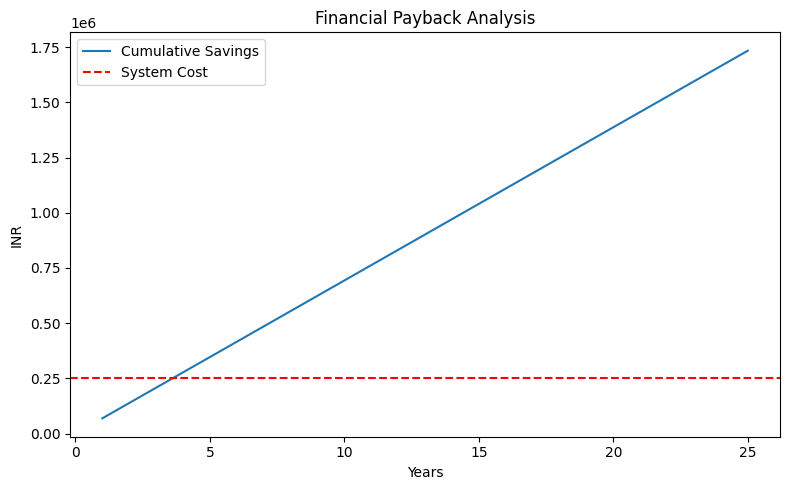

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(years, savings, label="Cumulative Savings")
plt.axhline(system_cost, color="r", linestyle="--", label="System Cost")
plt.xlabel("Years")
plt.ylabel("INR")
plt.title("Financial Payback Analysis")
plt.legend()
plt.tight_layout()
plt.savefig("../reports/financial_analysis.png", dpi=300)

In [9]:
print("✅ Financial analysis complete!")
print(f"   Annual Energy: {annual_energy:.2f} kWh")
print(f"   Annual Savings: ₹{annual_savings:,.0f}")
print(f"   Payback Period: {payback_years:.1f} years")
print("   Results saved to ../reports/financial_analysis.csv")

✅ Financial analysis complete!
   Annual Energy: 11557.23 kWh
   Annual Savings: ₹69,343
   Payback Period: 3.6 years
   Results saved to ../reports/financial_analysis.csv
